# <font color='black'>Aplicação de Convolutional Neural Networks nos dados do Fashion MNIST</font>
## <font color='black'>Leonara Alves</font>

As Redes Neurais Convolucionais (CNNs) são uma tecnologia muito utilizada para classificar problemas que envolvem imagens, sendo o estado da arte em redes neurais para solucionar problemas de Visão Computacional. 

O objetivo desse projeto é apresentar uma aplicação básica das CNNs nos dados do Fashion MNIST, popularmente conhecido e disponibilizado pelo Keras.

## Conjunto de dados Fashion MNIST

O conjunto de dados do Fashion MNIST contém 70.000 imagens em tons de cinza divididas em 10 classes. Essas imagens possuem uma baixa resolução (28x28 pixels) e, por isso, são um ótimo desafio para iniciantes testarem suas redes neurais convolucionais. Sua divisão para treinamento consiste em 60.000 imagens e para teste de 10.000 imagens.

![Fashion](images/fashion-mnist-sprite.png "Fashion")



## Importação dos Pacotes e dos Dados

Para esses dados, vamos utilizar somente os pacotes básicos para a visualização dos resultados, construção do modelo e preparação dos dados.

In [1]:
# Importando os pacotes para serem utilizados
import tensorflow as tf              
import numpy as np                   
import pandas as pd                  
import keras                         
import sklearn                       
import matplotlib.pyplot as plt                    

Using TensorFlow backend.


O próprio Keras fornece acesso aos dados do Fashion MNIST. Esses dados já chegam separados em dados de treinamento e de teste, perfeitamente amigáveis para a utilização.

In [2]:
# Importando os dados do fashion mnist
from keras.datasets import fashion_mnist

# Treino e Teste
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Os dados de x_train e y_train serão nossos dados de treinamento, com o x_train contendo os pixels das imagens e y_train contendo as classes de cada imagem; e x_test e y_test serão nossos dados de teste, com o x_test contendo os pixels das imagens e y_train contendo as classes de cada imagem 

Vamos visualizar o shape dos dados de treinamento e de teste.

In [3]:
# Print do Shape dos dados
print("Dados de Treinamento")
print("Shape x_train: {}".format(x_train.shape))
print("Shape y_train: {}".format(y_train.shape))
print()
print("Dados de Teste")
print("Shape x_test: {}".format(x_test.shape))
print("Shape y_test: {}".format(y_test.shape))

Dados de Treinamento
Shape x_train: (60000, 28, 28)
Shape y_train: (60000,)

Dados de Teste
Shape x_test: (10000, 28, 28)
Shape y_test: (10000,)


Note que temos no shape de x_train 60.000 imagens de dimensão 28x28, ou seja, 28 pixels de largura e 28 pixels de altura, contendo no total 28x28 = 784 pixels.

## Visualizando as imagens

Como somente temos os resultados das classes como valores de 0 a 9, vamos criar um dicionário para representar esses valores mais claramente em um gráfico.

![Classe](images/Classe_fmnist.png "Classe") 

In [4]:
# Criando um pequeno dicionario para classificação
nomes_classes = {'0': 'T-shirt/top' ,'1': 'Trouser', '2': 'Pullover', '3': 'Dress', '4': 'Coat',
                '5': 'Sandal', '6': 'Shirt', '7': 'Sneaker', '8': 'Bag', '9': 'Ankle boot'}

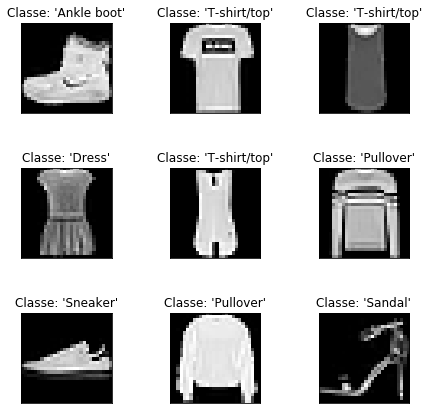

In [5]:
# Plotando algumas imagens do conjunto de dados (são muito pequenas, e por isso ficam borradas)
fig = plt.figure(figsize = (7,7))
fig.subplots_adjust(hspace = 0.6, wspace = 0.6)
for i in range(9):
    # definindo subplots
    ax = fig.add_subplot(330 + 1 + i)
    # plotando dados com seus títulos correspondentes
    plt.imshow(x_train[i], cmap = 'gray')
    plt.title("Classe: '{}'".format(nomes_classes[str(y_train[i])]))
    ax.set_xticks([])
    ax.set_yticks([])

Vamos verificar a contagem das classes nas bases de treinamento e de teste.

In [6]:
# Criando uma função para visualizar a quantidade de classes nas bases
def count_classes(array):
    contagem = [np.count_nonzero(array == i) for i in range(0, 10)]
    return contagem

In [7]:
# Visualizando a quantidade de classes na base de treino
count_classes(y_train)

[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]

In [8]:
# Visualizando a quantidade de classes nas base de teste
count_classes(y_test)

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

Observe que todas as classes são balanceadas nos dados de treinamento e de teste.

## Preparando os Dados

In [9]:
# Input das dimensões das imagens
img_rows, img_cols = 28, 28

In [10]:
# Conversão para float32 (obrigatório) 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Os dados são formados por pixels de 0 a 255, neste caso, precisamos normalizá-los para uma escala de 0 a 1 para treinar o modelo. Nesse caso, precisamos somente dividí-los por 255.

In [11]:
# Escala dos dados [0, 255] -> [0, 1]
x_train /= 255.0
x_test /= 255.0

Para o treinamento do modelo, vamos fazer uso dos dados de treinamento, validação e de teste. Como o Keras só disponibiliza dados de treinamento e de teste, vamos separar 20% dos dados de treinamento para validação mantendo o balanceamento entre as classes com o comando 'stratify'.

In [12]:
# Importando pacote para separação dos dados de treino e validação
from sklearn.model_selection import train_test_split

In [13]:
# Separação dos dados de treino e validação
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

In [14]:
# Visualizando a quantidade de classes na base de treino
count_classes(y_train)

[4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800]

In [15]:
# Visualizando a quantidade de classes na base de validação
count_classes(y_val)

[1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200]

In [16]:
# Definindo o numero de classes
num_classes = 10

In [17]:
# Vamos visualizar como estão nossos dados de teste
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Para o treinamento do modelo, devemos transformar nossos dados em formato binário da seguinte forma:
![Categoria](images/Classe_fmnist_categoria.png "Categoria") 

Dessa forma, cada neurônio de saída será representado por uma classe. Podemos utilizar a função do keras chamada de "to_categorical" que fornece os resultados após essas transformações.

In [18]:
# Converte vetores de classe para matrizes de classe binária
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [19]:
# Observando como ficaram os dados de treinamento após a transformação
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
# Observando como ficaram os dados de validação após a transformação
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Para o treinamento de uma CNN, precisamos deixar os dados em um formato específico. Esse formato é caracterizado por imagens com dimensão: (largura, altura, profundidade). Como temos somente imagens em escala de cinza, o valor da profundidade é igual a 1, porém se fosse em uma escala RGB (red, green, blue) a profundidade seria igual a 3. Sendo assim, devemos deixar o shape para a entrada dos dados no modelo com o formato de (28, 28, 1).

In [21]:
# importando o pacote para verificação da dimensão
from keras import backend as backend

In [22]:
# Verificando onde a dimensão de cores estão nos dados (profundidade, altura, largura) ou (altura, largura, profundidade)
backend.image_data_format()

'channels_last'

In [23]:
# Reshape dos dados de treino e de teste e input_shape
if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_val = x_val.reshape(x_val.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [24]:
# Print do reshape dos dados
print('x_train shape:', x_train.shape)
print("Exemplos dos dados de Treinamento: {}".format(x_train.shape[0]))
print("Exemplos dos dados de Validação: {}".format(x_val.shape[0]))
print("Exemplos dos dados de Teste: {}".format(x_test.shape[0]))
print("Input Shape: {}".format(input_shape))

x_train shape: (48000, 28, 28, 1)
Exemplos dos dados de Treinamento: 48000
Exemplos dos dados de Validação: 12000
Exemplos dos dados de Teste: 10000
Input Shape: (28, 28, 1)


## Definindo a CNN

Agora vamos criar a arquitetura do nosso modelo. Para isso, vamos importar alguns pacotes disponíveis no Keras que serão usados para a construção do modelo.

In [25]:
# Importação dos pacotes para o modelo de CNN 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Vamos definir o número de épocas igual a 50 (quantidade de passadas por todo o conjunto de treinamento) e o tamanho do batch em cada época igual a 128 (divisão  do conjunto de treinamento em pedaços menores).

In [26]:
# Definindo os hiperparâmetros
batch_size = 128   
epochs = 50

### Arquitetura do Modelo

#### O modelo seguirá os seguintes passos:
1. Camada de Convolution, 16 filtros e tamanho de kernel igual a 3 
2. Camada de Max Pooling, com o pool size igual a 2
3. Camada de Dropout, com probabilidade de Dropout igual a 0.2
4. Camada de Convolution, 32 filtros e tamanho de kernel igual a 3 
5. Camada de Max pooling, com o pool size igual a 2
6. Camada de Dropout, com probabilidade de Dropout igual a 0.2
7. Camada de Flattening
8. Camada de Full Connection (ou Dense), com 128 neurônios
9. Camada de Dropout, com probabilidade de Dropout igual a 0.50
10. Camada de Full Connection (ou camada de saída), com 10 neurônios (10 possíveis saídas)

In [27]:
# Modelo CNN
def create_model():
    model = Sequential()
    model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = input_shape))
    model.add(MaxPooling2D(pool_size = 2))
    model.add(Dropout(0.2))
    model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = 2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax'))
    return model

In [28]:
# Instanciando o modelo
model = create_model()

In [29]:
# Sumário do modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

Observe que temos 206,922 parâmetros que serão aprendidos por nossa rede neural.

Como temos 10 classes, vamos utilizar a métrica de cross-entropia para dados categóricos e a métrica de avaliação será a acurácia, mais comumente utilizada para dados de classificação. Além disso, vamos utilizar o otimizador Adadelta.

In [30]:
# Compilação do modelo
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adadelta', 
              metrics = ['accuracy'])

Para evitar o overfitting, vamos utilizar um procedimento de parada do treinamento da rede neural quando a perda nos dados de validação começam a aumentar ao invés de diminuir. Esse procedimento é chamado de 'Early Stopping' e também já está disponibilizado pelo Keras.

In [31]:
# Importando o Early Stopping
from keras.callbacks import EarlyStopping

In [32]:
# Aplicando um early stopping
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 0.005, patience = 5, verbose = 1, restore_best_weights = True)

Com o argumento 'patience' igual a 5, vamos esperar 5 épocas até o monitor finalizar o treinamento caso não obtivermos valores melhores no erro da função de perda.

## Treinamento da CNN

Vamos treinar nosso modelo utilizando os dados de treinamento e de validação,

In [33]:
# Fit do modelo
modelo_treinado = model.fit(x_train, y_train, 
                            batch_size = batch_size, 
                            epochs = epochs, 
                            verbose = 1, 
                            validation_data = (x_val, y_val), 
                            callbacks = [monitor])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 12s 260us/step - loss: 0.7568 - accuracy: 0.7224 - val_loss: 0.4325 - val_accuracy: 0.8468
Epoch 2/50
48000/48000 [==============================] - 12s 251us/step - loss: 0.4950 - accuracy: 0.8203 - val_loss: 0.3749 - val_accuracy: 0.8644
Epoch 3/50
48000/48000 [==============================] - 12s 244us/step - loss: 0.4380 - accuracy: 0.8416 - val_loss: 0.3396 - val_accuracy: 0.8792
Epoch 4/50
48000/48000 [==============================] - 12s 241us/step - loss: 0.4076 - accuracy: 0.8539 - val_loss: 0.3249 - val_accuracy: 0.8820
Epoch 5/50
48000/48000 [==============================] - 12s 245us/step - loss: 0.3814 - accuracy: 0.8639 - val_loss: 0.3062 - val_accuracy: 0.8885
Epoch 6/50
48000/48000 [==============================] - 12s 247us/step - loss: 0.3614 - accuracy: 0.8703 - val_loss: 0.2941 - val_accuracy: 0.8937
Epoch 7/50
48000/48000 [==============================] 

## Avaliando a Acurácia

Verificando a acurácia do modelo nos dados de treinamento e de validação

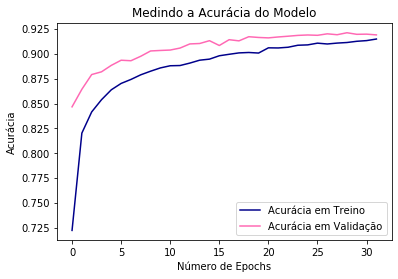

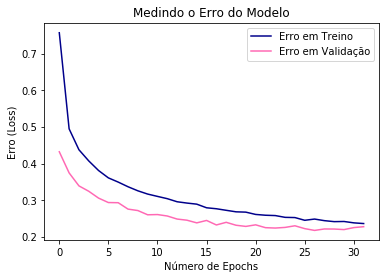

In [34]:
# Plot das métricas de acurácia e perda.
plt.figure(0)
plt.plot(modelo_treinado.history['accuracy'], label = 'Acurácia em Treino', color = "darkblue")
plt.plot(modelo_treinado.history['val_accuracy'], label = 'Acurácia em Validação', color = "hotpink")
plt.title('Medindo a Acurácia do Modelo')
plt.xlabel('Número de Epochs')
plt.ylabel('Acurácia')
plt.legend()

plt.figure(1)
plt.plot(modelo_treinado.history['loss'], label = 'Erro em Treino', color = "darkblue")
plt.plot(modelo_treinado.history['val_loss'], label = 'Erro em Validação', color = "hotpink")
plt.title('Medindo o Erro do Modelo')
plt.xlabel('Número de Epochs')
plt.ylabel('Erro (Loss)')
plt.legend()

# mostrando a figura
plt.show()

## Fazendo Previsões

Com nosso modelo treinado, vamos fazer as previsões para os dados de teste.

In [35]:
# Previsões nos dados de teste
score = model.evaluate(x_test, y_test, verbose = 0)
print("Acurácia: %.2f%%" % (score[1]*100), "| Erro (Loss): %.4f" % (score[0]))

Acurácia: 91.52% | Erro (Loss): 0.2355
